In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
df=pd.read_csv("Gestational.csv")

In [3]:
df

,Case Number,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes,Class Label(GDM /Non GDM)
0,1,22,2,1,NaN,55.0,0,0,0,0,102.0,69,NaN,12.0,0,0,0
1,2,26,2,1,NaN,53.0,0,0,0,0,101.0,63,NaN,12.4,0,0,0
2,3,29,1,0,NaN,50.0,0,0,0,0,118.0,79,NaN,14.3,0,0,0
3,4,28,2,1,NaN,51.0,0,0,0,0,99.0,70,NaN,15.0,0,0,0
4,5,21,2,1,NaN,52.0,0,0,0,0,116.0,65,NaN,15.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3520,3521,31,4,1,24.1,32.0,0,0,1,0,150.0,107,187.0,13.4,1,1,1
3521,3522,26,3,1,34.5,43.0,1,1,0,1,166.0,85,164.0,14.2,0,0,1
3522,3523,35,2,2,23.6,56.0,1,0,1,0,178.0,81,141.0,15.3,0,1,1
3523,3524,37,2,0,23.3,28.0,1,0,1,1,139.0,115,133.0,13.3,0,1,0


In [4]:
df.isnull().any()

Case Number                        False
Age                                False
No of Pregnancy                    False
Gestation in previous Pregnancy    False
BMI                                 True
HDL                                 True
Family History                     False
unexplained prenetal loss          False
Large Child or Birth Default       False
PCOS                               False
Sys BP                              True
Dia BP                             False
OGTT                                True
Hemoglobin                         False
Sedentary Lifestyle                False
Prediabetes                        False
Class Label(GDM /Non GDM)          False
dtype: bool

In [5]:
mis=df[['BMI','HDL','Sys BP','OGTT']]

In [6]:
mis

,BMI,HDL,Sys BP,OGTT
0,NaN,55.0,102.0,NaN
1,NaN,53.0,101.0,NaN
2,NaN,50.0,118.0,NaN
3,NaN,51.0,99.0,NaN
4,NaN,52.0,116.0,NaN
...,...,...,...,...
3520,24.1,32.0,150.0,187.0
3521,34.5,43.0,166.0,164.0
3522,23.6,56.0,178.0,141.0
3523,23.3,28.0,139.0,133.0


In [7]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy="mean", copy=True)

# Fit the imputer to the data
imp.fit(mis)

# Transform the data to fill missing values
mis_imputed = imp.transform(mis)

# Replace the original columns in df with the imputed values
df[['BMI', 'HDL', 'Sys BP', 'OGTT']] = mis_imputed

In [8]:
df

,Case Number,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes,Class Label(GDM /Non GDM)
0,1,22,2,1,27.854092,55.0,0,0,0,0,102.0,69,170.707503,12.0,0,0,0
1,2,26,2,1,27.854092,53.0,0,0,0,0,101.0,63,170.707503,12.4,0,0,0
2,3,29,1,0,27.854092,50.0,0,0,0,0,118.0,79,170.707503,14.3,0,0,0
3,4,28,2,1,27.854092,51.0,0,0,0,0,99.0,70,170.707503,15.0,0,0,0
4,5,21,2,1,27.854092,52.0,0,0,0,0,116.0,65,170.707503,15.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3520,3521,31,4,1,24.100000,32.0,0,0,1,0,150.0,107,187.000000,13.4,1,1,1
3521,3522,26,3,1,34.500000,43.0,1,1,0,1,166.0,85,164.000000,14.2,0,0,1
3522,3523,35,2,2,23.600000,56.0,1,0,1,0,178.0,81,141.000000,15.3,0,1,1
3523,3524,37,2,0,23.300000,28.0,1,0,1,1,139.0,115,133.000000,13.3,0,1,0


In [9]:
df.isnull().any()

Case Number                        False
Age                                False
No of Pregnancy                    False
Gestation in previous Pregnancy    False
BMI                                False
HDL                                False
Family History                     False
unexplained prenetal loss          False
Large Child or Birth Default       False
PCOS                               False
Sys BP                             False
Dia BP                             False
OGTT                               False
Hemoglobin                         False
Sedentary Lifestyle                False
Prediabetes                        False
Class Label(GDM /Non GDM)          False
dtype: bool

In [10]:
df.columns

Index(['Case Number', 'Age', 'No of Pregnancy',
       'Gestation in previous Pregnancy', 'BMI', 'HDL', 'Family History',
       'unexplained prenetal loss', 'Large Child or Birth Default', 'PCOS',
       'Sys BP', 'Dia BP', 'OGTT', 'Hemoglobin', 'Sedentary Lifestyle',
       'Prediabetes', 'Class Label(GDM /Non GDM)'],
      dtype='object')

In [11]:
X=df[['Age','No of Pregnancy','Gestation in previous Pregnancy','BMI','HDL','Family History','Large Child or Birth Default','PCOS','Sys BP','Dia BP','OGTT','Hemoglobin','Sedentary Lifestyle','Prediabetes']]
Y=df[['Class Label(GDM /Non GDM)']]

In [12]:
X

,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Family History,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes
0,22,2,1,27.854092,55.0,0,0,0,102.0,69,170.707503,12.0,0,0
1,26,2,1,27.854092,53.0,0,0,0,101.0,63,170.707503,12.4,0,0
2,29,1,0,27.854092,50.0,0,0,0,118.0,79,170.707503,14.3,0,0
3,28,2,1,27.854092,51.0,0,0,0,99.0,70,170.707503,15.0,0,0
4,21,2,1,27.854092,52.0,0,0,0,116.0,65,170.707503,15.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3520,31,4,1,24.100000,32.0,0,1,0,150.0,107,187.000000,13.4,1,1
3521,26,3,1,34.500000,43.0,1,0,1,166.0,85,164.000000,14.2,0,0
3522,35,2,2,23.600000,56.0,1,1,0,178.0,81,141.000000,15.3,0,1
3523,37,2,0,23.300000,28.0,1,1,1,139.0,115,133.000000,13.3,0,1


In [13]:
Y

,Class Label(GDM /Non GDM)
0,0
1,0
2,0
3,0
4,0
...,...
3520,1
3521,1
3522,1
3523,0


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=42)

In [15]:
X_test.shape

(1175, 14)

In [16]:
X_train.shape

(2350, 14)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [18]:
log_reg = LogisticRegression()

In [19]:
log_reg.fit(X_train, Y_train)

C:\Users\Naresh\.conda\envs\tf-new\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Naresh\.conda\envs\tf-new\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
log_pred = log_reg.predict(X_test)

In [21]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, log_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(Y_test, log_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, log_pred))


Accuracy: 0.9480851063829787
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       725
           1       0.96      0.90      0.93       450

    accuracy                           0.95      1175
   macro avg       0.95      0.94      0.94      1175
weighted avg       0.95      0.95      0.95      1175

Confusion Matrix:
[[709  16]
 [ 45 405]]


In [22]:
print(accuracy)

0.9480851063829787


In [23]:
X.dtypes

Age                                  int64
No of Pregnancy                      int64
Gestation in previous Pregnancy      int64
BMI                                float64
HDL                                float64
Family History                       int64
Large Child or Birth Default         int64
PCOS                                 int64
Sys BP                             float64
Dia BP                               int64
OGTT                               float64
Hemoglobin                         float64
Sedentary Lifestyle                  int64
Prediabetes                          int64
dtype: object

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators= 100, criterion="entropy")
classifier=classifier.fit(X_train,Y_train.values.ravel())

In [25]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [26]:
from sklearn.metrics import classification_report
clf_report=classification_report(Y_test.values.ravel(),y_pred)

In [27]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       725
           1       0.95      0.97      0.96       450

    accuracy                           0.97      1175
   macro avg       0.96      0.97      0.97      1175
weighted avg       0.97      0.97      0.97      1175



In [28]:
rfaccuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", rfaccuracy)


Accuracy: 0.9676595744680851


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, Y_train)
nb_pred = nb_classifier.predict(X_test_scaled)

C:\Users\Naresh\.conda\envs\tf-new\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, Y_train)
svm_pred = svm_classifier.predict(X_test_scaled)


C:\Users\Naresh\.conda\envs\tf-new\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
nb_accuracy = accuracy_score(Y_test, nb_pred)
svm_accuracy = accuracy_score(Y_test, svm_pred)

In [34]:
from sklearn.metrics import classification_report
nb_clf_report=classification_report(Y_test.values.ravel(),nb_pred)

In [35]:
print(nb_clf_report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       725
           1       0.93      0.91      0.92       450

    accuracy                           0.94      1175
   macro avg       0.94      0.93      0.94      1175
weighted avg       0.94      0.94      0.94      1175



In [36]:
from sklearn.metrics import classification_report
svm_clf_report=classification_report(Y_test.values.ravel(),svm_pred)

In [37]:
print(svm_clf_report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       725
           1       0.95      0.97      0.96       450

    accuracy                           0.97      1175
   macro avg       0.97      0.97      0.97      1175
weighted avg       0.97      0.97      0.97      1175



In [38]:
print(nb_accuracy )

0.9395744680851064


In [39]:
print(svm_accuracy)

0.9693617021276596


In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Set K=5 or any other desired value

# Train the classifier
knn_classifier.fit(X_train_scaled, Y_train)

# Predict on the test set
k_pred = knn_classifier.predict(X_test_scaled)

# Calculate accuracy
knn_accuracy = accuracy_score(Y_test, k_pred)
print("Accuracy:", knn_accuracy)

C:\Users\Naresh\.conda\envs\tf-new\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.9685106382978723


In [44]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
# Define XGBoost parameters
params = {
    'objective': 'multi:softmax',  # Use softmax for multi-class classification
    'num_class': len(set(Y_train_encoded)),  # Number of classes
    'eta': 0.1,  # Learning rate
    'max_depth': 3,  # Maximum depth of the tree
    'subsample': 0.7,  # Subsample ratio of the training instances
    'colsample_bytree': 0.7,  # Subsample ratio of features
    'eval_metric': 'mlogloss'  # Evaluation metric
}

# Initialize XGBClassifier with specified parameters
xgb_classifier = XGBClassifier(**params)

# Train XGBClassifier
xgb_classifier.fit(X_train_scaled, Y_train)

# Make predictions
xgb_pred = xgb_classifier.predict(X_test_scaled)

# Calculate accuracy
xgb_accuracy = accuracy_score(Y_test, xgb_pred)
print("Accuracy:", xgb_accuracy)


C:\Users\Naresh\.conda\envs\tf-new\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9668085106382979


In [45]:
from sklearn.metrics import precision_recall_fscore_support



# Calculate precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, log_pred, average='weighted')

print("Precision for Logistic Regression:", precision)
print("Recall for Logistic Regression:", recall)
print("F1 Score for Logistic Regression:", f1_score)


Precision for Logistic Regression: 0.948620111883871
Recall for Logistic Regression: 0.9480851063829787
F1 Score for Logistic Regression: 0.9477298210976505


In [46]:
from sklearn.metrics import precision_recall_fscore_support



# Calculate precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='weighted')

print("Precision for randomforest:", precision)
print("Recall for randomforest:", recall)
print("F1 Score for randomforest:", f1_score)


Precision for randomforest: 0.9679369659018132
Recall for randomforest: 0.9676595744680851
F1 Score for randomforest: 0.9677249759696567


In [47]:
from sklearn.metrics import precision_recall_fscore_support


# Calculate precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, nb_pred, average='weighted')

print("Precision for Navie bayes:", precision)
print("Recall for Navie bayes:", recall)
print("F1 Score for Navie bayes:", f1_score)


Precision for Navie bayes: 0.939453455450242
Recall for Navie bayes: 0.9395744680851064
F1 Score for Navie bayes: 0.939455659359995


In [48]:
from sklearn.metrics import precision_recall_fscore_support



# Calculate precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, svm_pred, average='weighted')

print("Precision for SVM:", precision)
print("Recall for SVM:", recall)
print("F1 Score for SVM:", f1_score)


Precision for SVM: 0.9696324951644102
Recall for SVM: 0.9693617021276596
F1 Score for SVM: 0.9694236614449381


In [49]:
from sklearn.metrics import precision_recall_fscore_support



# Calculate precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, k_pred, average='weighted')

print("Precision for KNN:", precision)
print("Recall for KNN:", recall)
print("F1 Score for KNN:", f1_score)


Precision for KNN: 0.9685253333826818
Recall for KNN: 0.9685106382978723
F1 Score for KNN: 0.9685172470770959


In [50]:
from sklearn.metrics import precision_recall_fscore_support



# Calculate precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, xgb_pred, average='weighted')

print("Precision for Xgboost:", precision)
print("Recall for Xgboost:", recall)
print("F1 Score for Xgboost:", f1_score)


Precision for Xgboost: 0.9671326323486427
Recall for Xgboost: 0.9668085106382979
F1 Score for Xgboost: 0.966882037187109


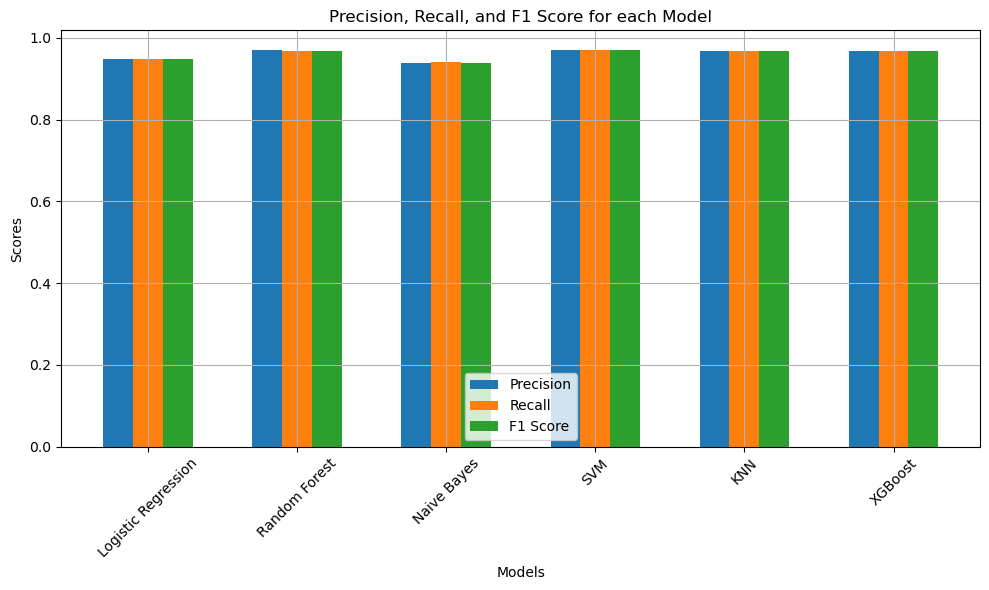

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
model_names = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM', 'KNN', 'XGBoost']

# Precision, Recall, and F1 scores for each model
precision_scores = [0.948620111883871, 0.9688275642559603, 0.939453455450242, 0.9696324951644102, 0.9685253333826818, 0.9671326323486427]
recall_scores = [0.9480851063829787, 0.9685106382978723, 0.9395744680851064, 0.9693617021276596, 0.9685106382978723, 0.9668085106382979]
f1_scores = [0.9477298210976505, 0.9685803942544369, 0.939455659359995, 0.9694236614449381, 0.9685172470770959, 0.966882037187109]

# Set positions for the bars
positions = np.arange(len(model_names))

# Set width for the bars
bar_width = 0.2

# Create bar plot for precision scoresa
plt.figure(figsize=(10, 6))
plt.bar(positions, precision_scores, width=bar_width, label='Precision')

# Create bar plot for recall scores
plt.bar(positions + bar_width, recall_scores, width=bar_width, label='Recall')

# Create bar plot for F1 scores
plt.bar(positions + 2 * bar_width, f1_scores, width=bar_width, label='F1 Score')

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1 Score for each Model')
plt.xticks(positions + bar_width, model_names, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [52]:
classifiers = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM', 'KNN', 'XGBoost']
accuracies = [accuracy,rfaccuracy,nb_accuracy,svm_accuracy,knn_accuracy,xgb_accuracy]

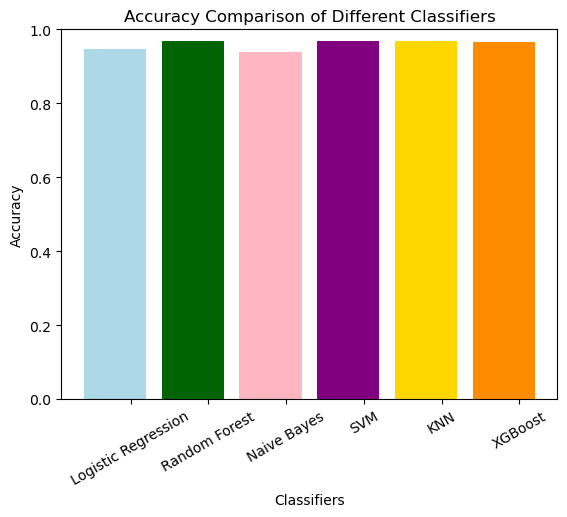

In [53]:
positionss = np.arange(len(classifiers))
colors = ['#ADD8E6', '#006400', '#FFB6C1', '#800080', '#FFD700', '#FF8C00' ]
plt.bar(classifiers, accuracies, color=colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Classifiers')
plt.xticks(positionss + bar_width, model_names, rotation=30)
plt.ylim(0, 1)
plt.show()

In [55]:
Age = int(input("Enter the value for 'Age': "))
NoofPregnancy = int(input("Enter the value for 'No of Pregnancy': "))
GestationinpreviousPregnancy= int(input("Enter the value for 'Gestation in previous Pregnancy': "))
BMI= float(input("Enter the value for 'BMI': "))
HDL= float(input("Enter the value for 'HDL': "))
FamilyHistory = int(input("Enter the value for 'Family History': "))
LargeChildorBirthDefault = int(input("Enter the value for 'Large Child or Birth Default': "))
PCOS = int(input("Enter the value for 'PCOS': "))
SysBP = float(input("Enter the value for 'Sys BP': "))
DiaBP = int(input("Enter the value for 'Dia BP': "))
OGTT = float(input("Enter the value for 'OGTT': "))
Hemoglobin = float(input("Enter the value for 'Hemoglobin': "))
SedentaryLifestyle = int(input("Enter the value for 'Sedentary Lifestyle': "))
Prediabetes = int(input("Enter the value for 'Prediabetes': "))

Enter the value for 'Age':  35
Enter the value for 'No of Pregnancy':  4
Enter the value for 'Gestation in previous Pregnancy':  2
Enter the value for 'BMI':  31.5
Enter the value for 'HDL':  46.47
Enter the value for 'Family History':  1
Enter the value for 'Large Child or Birth Default':  1
Enter the value for 'PCOS':  1
Enter the value for 'Sys BP':  135.76
Enter the value for 'Dia BP':  91
Enter the value for 'OGTT':  205.0
Enter the value for 'Hemoglobin':  16.0
Enter the value for 'Sedentary Lifestyle':  1
Enter the value for 'Prediabetes':  1


In [56]:
# Define input data with the required features
input_data = [[Age, NoofPregnancy, GestationinpreviousPregnancy, BMI, HDL, FamilyHistory,
               LargeChildorBirthDefault, PCOS, SysBP, DiaBP, OGTT, Hemoglobin,
               SedentaryLifestyle, Prediabetes]]

# Convert input data to a pandas DataFrame
input_df = pd.DataFrame(input_data, columns=['Age', 'No of Pregnancy', 'Gestation in previous Pregnancy', 'BMI', 'HDL', 
                                              'Family History', 'Large Child or Birth Default', 'PCOS', 'Sys BP', 
                                              'Dia BP', 'OGTT', 'Hemoglobin', 'Sedentary Lifestyle', 'Prediabetes'])

# Make predictions using the voting classifier
prediction = xgb_classifier.predict(input_df)

# Print the prediction
print("The predicted value is:", prediction)


The predicted value is: [1]


In [57]:
import joblib

# Assuming you have already trained a model named 'model'
# Save the model to a file
joblib.dump(xgb_classifier, 'new_gestational.pkl')

['new_gestational.pkl']

In [58]:
import pickle
with open('new_gestational.pkl', 'wb') as f:
    pickle.dump(xgb_classifier, f)